## Machine Learning Models

In [1]:
# for clear plotting on Macs
%config InlineBackend.figure_format='retina'

In [2]:
import pandas as pd
import numpy as np
import os
path = "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/15_modified_data/"
train_original = pd.read_csv(path+"train_data.csv")
val_original = pd.read_csv(path+"val_data.csv")
test_original = pd.read_csv(path+"test_data.csv")

In [4]:
pd.set_option('display.max_columns', None)
train_original.head(10)

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,max_temp,min_temp,precip,snow,snow_depth,wind_speed,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2019-09-24 06:30:00,2019-09-24 06:45:00,802.0,6.183132,10.0,3,2.55,False,1,2019-09-24,80.06,80.06,0.000000,0.0,0.0,210.27236,LINCOLN PARK,NEAR WEST SIDE,2019,September,24,Tuesday,6,0,1
1,2019-07-30 11:45:00,2019-07-30 12:30:00,2349.0,18.248731,35.0,0,8.11,False,1,2019-07-30,78.98,78.98,0.000000,0.0,0.0,161.05968,OHARE,NEAR NORTH SIDE,2019,July,30,Tuesday,11,0,0
2,2018-11-17 01:15:00,2018-11-17 01:30:00,684.0,5.277118,10.0,0,2.50,False,1,2018-11-17,37.04,37.04,1.181102,0.0,0.0,161.05968,NEAR NORTH SIDE,NORTH CENTER,2018,November,17,Saturday,1,1,0
3,2019-12-09 12:00:00,2019-12-09 12:15:00,698.0,3.079843,7.5,1,2.55,False,1,2019-12-09,48.92,48.92,0.196850,0.0,0.0,279.61750,WEST TOWN,NEAR WEST SIDE,2019,December,9,Monday,12,0,1
4,2018-12-17 15:00:00,2018-12-17 15:00:00,812.0,2.996371,7.5,0,2.50,False,1,2018-12-17,60.08,60.08,0.000000,0.0,0.0,161.05968,SOUTH SHORE,GREATER GRAND CROSSING,2018,December,17,Monday,15,0,0
5,2018-12-03 09:30:00,2018-12-03 09:45:00,569.0,1.415615,5.0,0,0.00,True,3,2018-12-03,35.96,35.96,0.000000,0.0,0.0,250.53728,NEAR NORTH SIDE,LOOP,2018,December,3,Monday,9,0,0
6,2019-08-23 14:15:00,2019-08-23 14:30:00,1297.0,5.171532,12.5,0,2.55,False,1,2019-08-23,75.02,75.02,0.000000,0.0,0.0,199.08766,UPTOWN,NEAR NORTH SIDE,2019,August,23,Friday,14,1,0
7,2018-12-15 17:30:00,2018-12-15 17:45:00,1541.0,7.953680,7.5,0,2.50,True,2,2018-12-15,48.02,48.02,0.000000,0.0,0.0,161.05968,LOOP,BRIGHTON PARK,2018,December,15,Saturday,17,1,0
8,2019-07-19 09:30:00,2019-07-19 10:00:00,1921.0,15.367562,22.5,4,7.55,False,1,2019-07-19,95.00,95.00,0.000000,0.0,0.0,199.08766,NEAR NORTH SIDE,GARFIELD RIDGE,2019,July,19,Friday,9,1,1
9,2019-02-14 18:45:00,2019-02-14 18:45:00,172.0,0.887416,2.5,0,2.55,False,1,2019-02-14,46.04,46.04,0.000000,0.0,0.0,239.35258,LOOP,NEAR SOUTH SIDE,2019,February,14,Thursday,18,0,0


In [5]:
len(train_original.columns)

25

In [6]:
train_original.describe()

,trip_seconds,trip_miles,fare,tip,additional_charges,trips_pooled,max_temp,min_temp,precip,snow,snow_depth,wind_speed,year,day,hour,weekend,nonzero_tip
count,83703.000000,83703.000000,83703.000000,83703.000000,83703.000000,83703.000000,83703.000000,83703.000000,83703.000000,83703.0,83703.0,83703.000000,83703.000000,83703.000000,83703.00000,83703.000000,83703.000000
mean,979.156733,4.840267,10.043875,0.517735,2.787474,1.244197,55.138039,55.138039,1.099085,0.0,0.0,200.661292,2018.937362,15.614279,13.80303,0.490783,0.179790
std,688.862939,4.711352,7.412249,1.418328,1.672035,0.704480,21.015795,21.015795,2.624258,0.0,0.0,57.785468,0.432909,8.735891,6.28805,0.499918,0.384015
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.860000,-8.860000,0.000000,0.0,0.0,80.529840,2018.000000,1.000000,0.00000,0.000000,0.000000
25%,509.000000,1.657950,5.000000,0.000000,2.550000,1.000000,37.940000,37.940000,0.000000,0.0,0.0,161.059680,2019.000000,8.000000,9.00000,0.000000,0.000000
50%,807.000000,3.209681,7.500000,0.000000,2.550000,1.000000,51.080000,51.080000,0.000000,0.0,0.0,181.192140,2019.000000,16.000000,15.00000,0.000000,0.000000
75%,1247.000000,6.141151,12.500000,0.000000,2.550000,1.000000,75.020000,75.020000,0.787402,0.0,0.0,239.352580,2019.000000,23.000000,19.00000,1.000000,0.000000
max,33647.000000,61.182788,225.000000,30.000000,21.550000,14.000000,96.980000,96.980000,22.598425,0.0,0.0,400.412260,2020.000000,31.000000,23.00000,1.000000,1.000000


In [7]:
train_original[train_original["precip"] >1]

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,max_temp,min_temp,precip,snow,snow_depth,wind_speed,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
2,2018-11-17 01:15:00,2018-11-17 01:30:00,684.0,5.277118,10.0,0,2.50,False,1,2018-11-17,37.04,37.04,1.181102,0.0,0.0,161.05968,NEAR NORTH SIDE,NORTH CENTER,2018,November,17,Saturday,1,1,0
12,2019-07-16 23:15:00,2019-07-16 23:30:00,600.0,3.082497,5.0,0,0.72,True,1,2019-07-16,84.02,84.02,1.496063,0.0,0.0,170.00744,NEAR NORTH SIDE,WEST TOWN,2019,July,16,Tuesday,23,0,0
14,2019-10-11 18:15:00,2019-10-11 18:30:00,900.0,5.865510,7.5,1,0.72,True,1,2019-10-11,68.00,68.00,4.606299,0.0,0.0,239.35258,NEAR NORTH SIDE,UPTOWN,2019,October,11,Friday,18,1,1
19,2019-05-07 18:45:00,2019-05-07 18:45:00,628.0,2.595294,7.5,0,2.55,False,1,2019-05-07,50.00,50.00,4.488189,0.0,0.0,219.22012,WOODLAWN,SOUTH SHORE,2019,May,7,Tuesday,18,0,0
24,2019-08-20 20:15:00,2019-08-20 20:30:00,667.0,1.876094,10.0,0,7.85,False,1,2019-08-20,78.08,78.08,1.692913,0.0,0.0,161.05968,NEAR NORTH SIDE,NEAR NORTH SIDE,2019,August,20,Tuesday,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83689,2019-05-24 00:00:00,2019-05-24 00:15:00,510.0,2.304354,5.0,0,2.55,False,1,2019-05-24,78.08,78.08,1.102362,0.0,0.0,199.08766,LINCOLN SQUARE,LAKE VIEW,2019,May,24,Friday,0,1,0
83690,2019-05-19 03:45:00,2019-05-19 04:00:00,552.0,4.326686,10.0,0,2.55,False,1,2019-05-19,75.02,75.02,3.385827,0.0,0.0,299.74996,LOOP,LOWER WEST SIDE,2019,May,19,Sunday,3,1,0
83694,2019-11-21 08:15:00,2019-11-21 08:30:00,883.0,3.510000,10.0,0,2.55,False,1,2019-11-21,55.94,55.94,4.881890,0.0,0.0,319.88242,KENWOOD,GRAND BOULEVARD,2019,November,21,Thursday,8,0,0
83698,2019-04-29 13:00:00,2019-04-29 13:15:00,1390.0,5.596053,12.5,2,2.55,False,1,2019-04-29,53.06,53.06,11.417323,0.0,0.0,279.61750,LOOP,ARMOUR SQUARE,2019,April,29,Monday,13,0,1


In [8]:
train_original.corr()["nonzero_tip"]

trip_seconds              0.054385
trip_miles                0.059404
fare                      0.100271
tip                       0.779674
additional_charges        0.132266
shared_trip_authorized   -0.127450
trips_pooled             -0.091235
max_temp                  0.015727
min_temp                  0.015727
precip                    0.003065
snow                           NaN
snow_depth                     NaN
wind_speed                0.003817
year                      0.008454
day                       0.001954
hour                      0.022261
weekend                   0.000137
nonzero_tip               1.000000
Name: nonzero_tip, dtype: float64

In [9]:
train_original[train_original["fare"] > 100]

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,max_temp,min_temp,precip,snow,snow_depth,wind_speed,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
13383,2020-01-28 10:15:00,2020-01-28 19:45:00,33647.0,15.950901,225.0,0,5.39,False,1,2020-01-28,33.08,33.08,0.000000,0.0,0.0,100.66230,LOOP,NEAR WEST SIDE,2020,January,28,Tuesday,10,0,0
17765,2019-10-06 16:45:00,2019-10-06 17:30:00,2989.0,19.150000,117.5,0,7.10,False,1,2019-10-06,69.08,69.08,0.000000,0.0,0.0,181.19214,NEAR NORTH SIDE,OHARE,2019,October,6,Sunday,16,1,0
18828,2019-06-13 09:00:00,2019-06-13 09:30:00,1976.0,18.422883,105.0,0,7.86,False,1,2019-06-13,69.08,69.08,0.196850,0.0,0.0,250.53728,NEAR NORTH SIDE,OHARE,2019,June,13,Thursday,9,0,0
19842,2019-07-20 17:00:00,2019-07-20 17:30:00,1833.0,16.781689,102.5,0,2.10,False,1,2019-07-20,96.98,96.98,0.118110,0.0,0.0,290.80220,ENGLEWOOD,ENGLEWOOD,2019,July,20,Saturday,17,1,0
30532,2019-07-24 11:15:00,2019-07-24 11:45:00,2449.0,28.394332,112.5,0,7.10,False,1,2019-07-24,80.06,80.06,0.000000,0.0,0.0,140.92722,NEAR NORTH SIDE,OHARE,2019,July,24,Wednesday,11,0,0
40375,2019-05-18 15:30:00,2019-05-18 17:00:00,4970.0,29.293925,102.5,0,8.30,False,1,2019-05-18,82.94,82.94,4.212598,0.0,0.0,331.06712,NEAR SOUTH SIDE,OHARE,2019,May,18,Saturday,15,1,0
42563,2019-06-05 17:30:00,2019-06-05 18:45:00,4735.0,18.118195,132.5,0,7.85,False,1,2019-06-05,86.00,86.00,3.818898,0.0,0.0,199.08766,NEAR NORTH SIDE,OHARE,2019,June,5,Wednesday,17,0,0
43344,2019-05-05 06:00:00,2019-05-05 07:15:00,3923.0,39.874095,105.0,5,7.55,False,1,2019-05-05,73.94,73.94,0.000000,0.0,0.0,161.05968,LOOP,OHARE,2019,May,5,Sunday,6,1,1
66167,2019-01-07 06:15:00,2019-01-07 07:15:00,3975.0,19.174191,120.0,19,7.70,False,1,2019-01-07,55.04,55.04,3.818898,0.0,0.0,259.48504,NEAR NORTH SIDE,OHARE,2019,January,7,Monday,6,0,1
77439,2019-10-23 11:15:00,2019-10-23 12:00:00,2442.0,18.100000,107.5,29,7.10,False,1,2019-10-23,60.08,60.08,0.118110,0.0,0.0,181.19214,OHARE,LOOP,2019,October,23,Wednesday,11,0,1


In [10]:
train_original["additional_charges"].describe()

count    83703.000000
mean         2.787474
std          1.672035
min          0.000000
25%          2.550000
50%          2.550000
75%          2.550000
max         21.550000
Name: additional_charges, dtype: float64

Combine train + val and encode

In [11]:
data = pd.concat([train_original, val_original, test_original], keys=[0, 1, 2])
data = data[
    data.columns.difference(["trip_start_timestamp", "trip_end_timestamp", "date", "snow", "snow_depth"])
]
# re-organize the order of the columns
data = data[
    [
        "year",
        "month",
        "day",
        "day_of_week",
        "weekend",
        "hour",
        "fare",
        "tip",
        "nonzero_tip",
        "additional_charges",
        "shared_trip_authorized",
        "trips_pooled",
        "trip_miles",
        "trip_seconds",
        "pickup_community_name",
        "dropoff_community_name",
        "precip",
        "max_temp",
        "min_temp",
        "wind_speed"
    ]
]

# convert shared_trip_authorized to a dummy
data["shared_trip_authorized"] = np.where(
    data["shared_trip_authorized"] == "True", 1, 0
)
data.head(10)


year      month  day day_of_week  weekend  hour  fare  tip  nonzero_tip  \
0 0  2019  September   24     Tuesday        0     6  10.0    3            1   
  1  2019       July   30     Tuesday        0    11  35.0    0            0   
  2  2018   November   17    Saturday        1     1  10.0    0            0   
  3  2019   December    9      Monday        0    12   7.5    1            1   
  4  2018   December   17      Monday        0    15   7.5    0            0   
  5  2018   December    3      Monday        0     9   5.0    0            0   
  6  2019     August   23      Friday        1    14  12.5    0            0   
  7  2018   December   15    Saturday        1    17   7.5    0            0   
  8  2019       July   19      Friday        1     9  22.5    4            1   
  9  2019   February   14    Thursday        0    18   2.5    0            0   

     additional_charges  shared_trip_authorized  trips_pooled  trip_miles  \
0 0                2.55                       0             1    6.183132   
  1                8.11                       0             1   18.248731   
  2                2.50                       0             1    5.277118   
  3                2.55                       0             1    3.079843   
  4                2.50                       0             1    2.996371   
  5                0.00                       0             3    1.415615   
  6                2.55                       0             1    5.171532   
  7                2.50                       0             2    7.953680   
  8                7.55                       0             1   15.367562   
  9                2.55                       0             1    0.887416   

     trip_seconds pickup_community_name  dropoff_community_name    precip  \
0 0         802.0          LINCOLN PARK          NEAR WEST SIDE  0.000000   
  1        2349.0                 OHARE         NEAR NORTH SIDE  0.000000   
  2         684.0       NEAR NORTH SIDE            NORTH CENTER  1.181102   
  3         698.0             WEST TOWN          NEAR WEST SIDE  0.196850   
  4         812.0           SOUTH SHORE  GREATER GRAND CROSSING  0.000000   
  5         569.0       NEAR NORTH SIDE                    LOOP  0.000000   
  6        1297.0                UPTOWN         NEAR NORTH SIDE  0.000000   
  7        1541.0                  LOOP           BRIGHTON PARK  0.000000   
  8        1921.0       NEAR NORTH SIDE          GARFIELD RIDGE  0.000000   
  9         172.0                  LOOP         NEAR SOUTH SIDE  0.000000   

     max_temp  min_temp  wind_speed  
0 0     80.06     80.06   210.27236  
  1     78.98     78.98   161.05968  
  2     37.04     37.04   161.05968  
  3     48.92     48.92   279.61750  
  4     60.08     60.08   161.05968  
  5     35.96     35.96   250.53728  
  6     75.02     75.02   199.08766  
  7     48.02     48.02   161.05968  
  8     95.00     95.00   199.08766  
  9     46.04     46.04   239.35258

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 119576 entries, (0, 0) to (2, 23915)
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    119576 non-null  int64  
 1   month                   119576 non-null  object 
 2   day                     119576 non-null  int64  
 3   day_of_week             119576 non-null  object 
 4   weekend                 119576 non-null  int64  
 5   hour                    119576 non-null  int64  
 6   fare                    119576 non-null  float64
 7   tip                     119576 non-null  int64  
 8   nonzero_tip             119576 non-null  int64  
 9   additional_charges      119576 non-null  float64
 10  shared_trip_authorized  119576 non-null  int64  
 11  trips_pooled            119576 non-null  int64  
 12  trip_miles              119576 non-null  float64
 13  trip_seconds            119576 non-null  float64
 14  pickup_comm

In [13]:
data.isnull().sum()

year                      0
month                     0
day                       0
day_of_week               0
weekend                   0
hour                      0
fare                      0
tip                       0
nonzero_tip               0
additional_charges        0
shared_trip_authorized    0
trips_pooled              0
trip_miles                0
trip_seconds              0
pickup_community_name     0
dropoff_community_name    0
precip                    0
max_temp                  0
min_temp                  0
wind_speed                0
dtype: int64

### Feature Engineering

In [14]:
month_map = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}
data["month_int"] = data["month"].map(month_map)
day_map = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7,
}
data["day_ofweek_int"] = data["day_of_week"].map(day_map)
# train['day_ofweek_int'].value_counts()
# train.drop(['day_of_week', 'month' ], axis=1, inplace=True)
data.head(10)


year      month  day day_of_week  weekend  hour  fare  tip  nonzero_tip  \
0 0  2019  September   24     Tuesday        0     6  10.0    3            1   
  1  2019       July   30     Tuesday        0    11  35.0    0            0   
  2  2018   November   17    Saturday        1     1  10.0    0            0   
  3  2019   December    9      Monday        0    12   7.5    1            1   
  4  2018   December   17      Monday        0    15   7.5    0            0   
  5  2018   December    3      Monday        0     9   5.0    0            0   
  6  2019     August   23      Friday        1    14  12.5    0            0   
  7  2018   December   15    Saturday        1    17   7.5    0            0   
  8  2019       July   19      Friday        1     9  22.5    4            1   
  9  2019   February   14    Thursday        0    18   2.5    0            0   

     additional_charges  shared_trip_authorized  trips_pooled  trip_miles  \
0 0                2.55                       0             1    6.183132   
  1                8.11                       0             1   18.248731   
  2                2.50                       0             1    5.277118   
  3                2.55                       0             1    3.079843   
  4                2.50                       0             1    2.996371   
  5                0.00                       0             3    1.415615   
  6                2.55                       0             1    5.171532   
  7                2.50                       0             2    7.953680   
  8                7.55                       0             1   15.367562   
  9                2.55                       0             1    0.887416   

     trip_seconds pickup_community_name  dropoff_community_name    precip  \
0 0         802.0          LINCOLN PARK          NEAR WEST SIDE  0.000000   
  1        2349.0                 OHARE         NEAR NORTH SIDE  0.000000   
  2         684.0       NEAR NORTH SIDE            NORTH CENTER  1.181102   
  3         698.0             WEST TOWN          NEAR WEST SIDE  0.196850   
  4         812.0           SOUTH SHORE  GREATER GRAND CROSSING  0.000000   
  5         569.0       NEAR NORTH SIDE                    LOOP  0.000000   
  6        1297.0                UPTOWN         NEAR NORTH SIDE  0.000000   
  7        1541.0                  LOOP           BRIGHTON PARK  0.000000   
  8        1921.0       NEAR NORTH SIDE          GARFIELD RIDGE  0.000000   
  9         172.0                  LOOP         NEAR SOUTH SIDE  0.000000   

     max_temp  min_temp  wind_speed  month_int  day_ofweek_int  
0 0     80.06     80.06   210.27236          9               2  
  1     78.98     78.98   161.05968          7               2  
  2     37.04     37.04   161.05968         11               6  
  3     48.92     48.92   279.61750         12               1  
  4     60.08     60.08   161.05968         12               1  
  5     35.96     35.96   250.53728         12               1  
  6     75.02     75.02   199.08766          8               5  
  7     48.02     48.02   161.05968         12               6  
  8     95.00     95.00   199.08766          7               5  
  9     46.04     46.04   239.35258          2               4

day hour

In [15]:
data['time_of_day'] = 's'
data.loc[(data['hour'] >= 4) & (data['hour'] < 7), 'time_of_day'] = 'early morning'
data.loc[(data['hour'] >= 7) & (data['hour'] < 11), 'time_of_day'] = 'morning rush hour'
data.loc[(data['hour'] >= 11) & (data['hour'] < 14), 'time_of_day'] = 'midday'
data.loc[(data['hour'] >= 14) & (data['hour'] < 16), 'time_of_day'] = 'afternoon'
data.loc[(data['hour'] >= 16) & (data['hour'] < 19), 'time_of_day'] = 'aft rush hour'
data.loc[(data['hour'] >= 19) & (data['hour'] < 23), 'time_of_day'] = 'evening'
data.loc[(data['hour'] >= 23) | (data['hour'] < 4), 'time_of_day'] = 'late night'

season

In [16]:
data['season'] = 's'
data.loc[(data['month_int'] >= 3) & (data['month_int'] <= 5), 'season'] = 'spring'
data.loc[(data['month_int'] >= 6) & (data['month_int'] <= 8), 'season'] = 'summer'
data.loc[(data['month_int'] >= 9) & (data['month_int'] <= 11), 'season'] = 'autumn'
data.loc[(data['month_int'] >= 12) | (data['month_int'] <= 2), 'season'] = 'winter'

Public holiday

In [17]:
data['public_hol'] = 0

data.loc[(data['month_int'] == 1) & (data['day'] == 1), 'public_hol'] = 1
data.loc[(data['month_int'] == 6) & (data['day'] == 19), 'public_hol'] = 1
data.loc[(data['month_int'] == 7) & (data['day'] == 4), 'public_hol'] = 1
data.loc[(data['month_int'] == 11) & (data['day'] == 11), 'public_hol'] = 1
data.loc[(data['month_int'] == 12) & (data['day'] == 25), 'public_hol'] = 1

# MLK
data.loc[(data['month_int'] == 1) & (data['day'] == 15) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 1) & (data['day'] == 21) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 1) & (data['day'] == 20) & (data['year'] == 2020), 'public_hol'] = 1

# presidents day
data.loc[(data['month_int'] == 2) & (data['day'] == 19) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 2) & (data['day'] == 18) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 2) & (data['day'] == 17) & (data['year'] == 2020), 'public_hol'] = 1

# memorial
data.loc[(data['month_int'] == 5) & (data['day'] == 28) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 5) & (data['day'] == 27) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 5) & (data['day'] == 25) & (data['year'] == 2020), 'public_hol'] = 1

# labour day
data.loc[(data['month_int'] == 9) & (data['day'] == 3) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 9) & (data['day'] == 2) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 9) & (data['day'] == 7) & (data['year'] == 2020), 'public_hol'] = 1


# columbus day
data.loc[(data['month_int'] == 10) & (data['day'] == 8) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 10) & (data['day'] == 14) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 10) & (data['day'] == 12) & (data['year'] == 2020), 'public_hol'] = 1


# thanksgiving
data.loc[(data['month_int'] == 11) & (data['day'] == 22) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 11) & (data['day'] == 28) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 11) & (data['day'] == 26) & (data['year'] == 2020), 'public_hol'] = 1

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 119576 entries, (0, 0) to (2, 23915)
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    119576 non-null  int64  
 1   month                   119576 non-null  object 
 2   day                     119576 non-null  int64  
 3   day_of_week             119576 non-null  object 
 4   weekend                 119576 non-null  int64  
 5   hour                    119576 non-null  int64  
 6   fare                    119576 non-null  float64
 7   tip                     119576 non-null  int64  
 8   nonzero_tip             119576 non-null  int64  
 9   additional_charges      119576 non-null  float64
 10  shared_trip_authorized  119576 non-null  int64  
 11  trips_pooled            119576 non-null  int64  
 12  trip_miles              119576 non-null  float64
 13  trip_seconds            119576 non-null  float64
 14  pickup_comm

In [19]:
data.drop(["month_int", "day_ofweek_int"], axis=1,inplace=True)

In [20]:
encode = pd.get_dummies(data)
encode

year  day  weekend  hour  fare  tip  nonzero_tip  additional_charges  \
0 0      2019   24        0     6  10.0    3            1                2.55   
  1      2019   30        0    11  35.0    0            0                8.11   
  2      2018   17        1     1  10.0    0            0                2.50   
  3      2019    9        0    12   7.5    1            1                2.55   
  4      2018   17        0    15   7.5    0            0                2.50   
...       ...  ...      ...   ...   ...  ...          ...                 ...   
2 23911  2020   21        0    18   7.5    0            0                3.08   
  23912  2019    3        1    11  10.0    1            1                2.55   
  23913  2019   25        0    13  15.0    0            0                2.55   
  23914  2019   26        0    17  20.0    0            0                2.55   
  23915  2019    9        1    19   5.0    0            0                2.55   

         shared_trip_authorized  trips_pooled  trip_miles  trip_seconds  \
0 0                           0             1    6.183132         802.0   
  1                           0             1   18.248731        2349.0   
  2                           0             1    5.277118         684.0   
  3                           0             1    3.079843         698.0   
  4                           0             1    2.996371         812.0   
...                         ...           ...         ...           ...   
2 23911                       0             1    1.560000         507.0   
  23912                       0             1    3.407916         670.0   
  23913                       0             1    7.680804        1373.0   
  23914                       0             1    9.087253        2350.0   
  23915                       0             2    1.900103         685.0   

           precip  max_temp  min_temp  wind_speed  public_hol  month_April  \
0 0      0.000000     80.06     80.06   210.27236           0            0   
  1      0.000000     78.98     78.98   161.05968           0            0   
  2      1.181102     37.04     37.04   161.05968           0            0   
  3      0.196850     48.92     48.92   279.61750           0            0   
  4      0.000000     60.08     60.08   161.05968           0            0   
...           ...       ...       ...         ...         ...          ...   
2 23911  0.000000     31.10     31.10   161.05968           0            0   
  23912  0.196850     57.02     57.02   181.19214           0            0   
  23913  0.000000     23.18     23.18   279.61750           0            0   
  23914  3.503937     53.96     53.96   170.00744           0            0   
  23915  3.700787     44.06     44.06   331.06712           0            0   

         month_August  month_December  month_February  month_January  \
0 0                 0               0               0              0   
  1                 0               0               0              0   
  2                 0               0               0              0   
  3                 0               1               0              0   
  4                 0               1               0              0   
...               ...             ...             ...            ...   
2 23911             0               0               0              1   
  23912             0               0               0              0   
  23913             0               0               1              0   
  23914             0               0               0              0   
  23915             0               0               0              0   

         month_July  month_June  month_March  month_May  month_November  \
0 0               0           0            0          0               0   
  1               1           0            0          0               0   
  2               0           0            0          0               1   
  3               0           0  

Split training and validation set

In [21]:
train, val, test = encode.xs(0),encode.xs(1), encode.xs(2)

In [28]:
train.describe()

,year,day,weekend,hour,fare,tip,nonzero_tip,additional_charges,shared_trip_authorized,trips_pooled,trip_miles,trip_seconds,precip,max_temp,min_temp,wind_speed,public_hol,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,pickup_community_name_ALBANY PARK,pickup_community_name_ARCHER HEIGHTS,pickup_community_name_ARMOUR SQUARE,pickup_community_name_ASHBURN,pickup_community_name_AUBURN GRESHAM,pickup_community_name_AUSTIN,pickup_community_name_AVALON PARK,pickup_community_name_AVONDALE,pickup_community_name_BELMONT CRAGIN,pickup_community_name_BEVERLY,pickup_community_name_BRIDGEPORT,pickup_community_name_BRIGHTON PARK,pickup_community_name_BURNSIDE,pickup_community_name_CALUMET HEIGHTS,pickup_community_name_CHATHAM,pickup_community_name_CHICAGO LAWN,pickup_community_name_CLEARING,pickup_community_name_DOUGLAS,pickup_community_name_DUNNING,pickup_community_name_EAST GARFIELD PARK,pickup_community_name_EAST SIDE,pickup_community_name_EDGEWATER,pickup_community_name_EDISON PARK,pickup_community_name_ENGLEWOOD,pickup_community_name_FOREST GLEN,pickup_community_name_FULLER PARK,pickup_community_name_GAGE PARK,pickup_community_name_GARFIELD RIDGE,pickup_community_name_GRAND BOULEVARD,pickup_community_name_GREATER GRAND CROSSING,pickup_community_name_HEGEWISCH,pickup_community_name_HERMOSA,pickup_community_name_HUMBOLDT PARK,pickup_community_name_HYDE PARK,pickup_community_name_IRVING PARK,pickup_community_name_JEFFERSON PARK,pickup_community_name_KENWOOD,pickup_community_name_LAKE VIEW,pickup_community_name_LINCOLN PARK,pickup_community_name_LINCOLN SQUARE,pickup_community_name_LOGAN SQUARE,pickup_community_name_LOOP,pickup_community_name_LOWER WEST SIDE,pickup_community_name_MCKINLEY PARK,pickup_community_name_MONTCLARE,pickup_community_name_MORGAN PARK,pickup_community_name_MOUNT GREENWOOD,pickup_community_name_NEAR NORTH SIDE,pickup_community_name_NEAR SOUTH SIDE,pickup_community_name_NEAR WEST SIDE,pickup_community_name_NEW CITY,pickup_community_name_NORTH CENTER,pickup_community_name_NORTH LAWNDALE,pickup_community_name_NORTH PARK,pickup_community_name_NORWOOD PARK,pickup_community_name_OAKLAND,pickup_community_name_OHARE,pickup_community_name_PORTAGE PARK,pickup_community_name_PULLMAN,pickup_community_name_RIVERDALE,pickup_community_name_ROGERS PARK,pickup_community_name_ROSELAND,pickup_community_name_SOUTH CHICAGO,pickup_community_name_SOUTH DEERING,pickup_community_name_SOUTH LAWNDALE,pickup_community_name_SOUTH SHORE,pickup_community_name_UPTOWN,pickup_community_name_WASHINGTON HEIGHTS,pickup_community_name_WASHINGTON PARK,pickup_community_name_WEST ELSDON,pickup_community_name_WEST ENGLEWOOD,pickup_community_name_WEST GARFIELD PARK,pickup_community_name_WEST LAWN,pickup_community_name_WEST PULLMAN,pickup_community_name_WEST RIDGE,pickup_community_name_WEST TOWN,pickup_community_name_WOODLAWN,dropoff_community_name_ALBANY PARK,dropoff_community_name_ARCHER HEIGHTS,dropoff_community_name_ARMOUR SQUARE,dropoff_community_name_ASHBURN,dropoff_community_name_AUBURN GRESHAM,dropoff_community_name_AUSTIN,dropoff_community_name_AVALON PARK,dropoff_community_name_AVONDALE,dropoff_community_name_BELMONT CRAGIN,dropoff_community_name_BEVERLY,dropoff_community_name_BRIDGEPORT,dropoff_community_name_BRIGHTON PARK,dropoff_community_name_BURNSIDE,dropoff_community_name_CALUMET HEIGHTS,dropoff_community_name_CHATHAM,dropoff_community_name_CHICAGO LAWN,dropoff_community_name_CLEARING,dropoff_community_name_DOUGLAS,dropoff_community_name_DUNNING,dropoff_community_name_EAST GARFIELD PARK,dropoff_community_name_EAST SIDE,dropoff_community_name_EDGEWATER,dropoff_community_name_EDISON PARK,dropoff_community_name_ENGLEWOOD,dropoff_community_name_FOREST GLEN,dropoff_community_name_FULLER PARK,dropoff_comm

Split X and y (for binary classification)

In [22]:
# X_train = train[train.columns.difference(["nonzero_tip", "tip"])].to_numpy()
# y_train = train[["nonzero_tip"]].to_numpy()
# X_val = val[val.columns.difference(["nonzero_tip", "tip"])].to_numpy()
# y_val = val[["nonzero_tip"]].to_numpy()
# X_test = test[test.columns.difference(["nonzero_tip", "tip"])].to_numpy()
# y_test = test[["nonzero_tip"]].to_numpy()

In [81]:
X_train = train[train.columns.difference(["nonzero_tip", "tip"])]
y_train = train[["nonzero_tip"]]
X_val = val[val.columns.difference(["nonzero_tip", "tip"])]
y_val = val[["nonzero_tip"]]
X_test = test[test.columns.difference(["nonzero_tip", "tip"])]
y_test = test[["nonzero_tip"]]

In [82]:
X_train

,additional_charges,day,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,dropoff_community_name_ALBANY PARK,dropoff_community_name_ARCHER HEIGHTS,dropoff_community_name_ARMOUR SQUARE,dropoff_community_name_ASHBURN,dropoff_community_name_AUBURN GRESHAM,dropoff_community_name_AUSTIN,dropoff_community_name_AVALON PARK,dropoff_community_name_AVONDALE,dropoff_community_name_BELMONT CRAGIN,dropoff_community_name_BEVERLY,dropoff_community_name_BRIDGEPORT,dropoff_community_name_BRIGHTON PARK,dropoff_community_name_BURNSIDE,dropoff_community_name_CALUMET HEIGHTS,dropoff_community_name_CHATHAM,dropoff_community_name_CHICAGO LAWN,dropoff_community_name_CLEARING,dropoff_community_name_DOUGLAS,dropoff_community_name_DUNNING,dropoff_community_name_EAST GARFIELD PARK,dropoff_community_name_EAST SIDE,dropoff_community_name_EDGEWATER,dropoff_community_name_EDISON PARK,dropoff_community_name_ENGLEWOOD,dropoff_community_name_FOREST GLEN,dropoff_community_name_FULLER PARK,dropoff_community_name_GAGE PARK,dropoff_community_name_GARFIELD RIDGE,dropoff_community_name_GRAND BOULEVARD,dropoff_community_name_GREATER GRAND CROSSING,dropoff_community_name_HEGEWISCH,dropoff_community_name_HERMOSA,dropoff_community_name_HUMBOLDT PARK,dropoff_community_name_HYDE PARK,dropoff_community_name_IRVING PARK,dropoff_community_name_JEFFERSON PARK,dropoff_community_name_KENWOOD,dropoff_community_name_LAKE VIEW,dropoff_community_name_LINCOLN PARK,dropoff_community_name_LINCOLN SQUARE,dropoff_community_name_LOGAN SQUARE,dropoff_community_name_LOOP,dropoff_community_name_LOWER WEST SIDE,dropoff_community_name_MCKINLEY PARK,dropoff_community_name_MONTCLARE,dropoff_community_name_MORGAN PARK,dropoff_community_name_MOUNT GREENWOOD,dropoff_community_name_NEAR NORTH SIDE,dropoff_community_name_NEAR SOUTH SIDE,dropoff_community_name_NEAR WEST SIDE,dropoff_community_name_NEW CITY,dropoff_community_name_NORTH CENTER,dropoff_community_name_NORTH LAWNDALE,dropoff_community_name_NORTH PARK,dropoff_community_name_NORWOOD PARK,dropoff_community_name_OAKLAND,dropoff_community_name_OHARE,dropoff_community_name_PORTAGE PARK,dropoff_community_name_PULLMAN,dropoff_community_name_RIVERDALE,dropoff_community_name_ROGERS PARK,dropoff_community_name_ROSELAND,dropoff_community_name_SOUTH CHICAGO,dropoff_community_name_SOUTH DEERING,dropoff_community_name_SOUTH LAWNDALE,dropoff_community_name_SOUTH SHORE,dropoff_community_name_UPTOWN,dropoff_community_name_WASHINGTON HEIGHTS,dropoff_community_name_WASHINGTON PARK,dropoff_community_name_WEST ELSDON,dropoff_community_name_WEST ENGLEWOOD,dropoff_community_name_WEST GARFIELD PARK,dropoff_community_name_WEST LAWN,dropoff_community_name_WEST PULLMAN,dropoff_community_name_WEST RIDGE,dropoff_community_name_WEST TOWN,dropoff_community_name_WOODLAWN,fare,hour,max_temp,min_temp,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,pickup_community_name_ALBANY PARK,pickup_community_name_ARCHER HEIGHTS,pickup_community_name_ARMOUR SQUARE,pickup_community_name_ASHBURN,pickup_community_name_AUBURN GRESHAM,pickup_community_name_AUSTIN,pickup_community_name_AVALON PARK,pickup_community_name_AVONDALE,pickup_community_name_BELMONT CRAGIN,pickup_community_name_BEVERLY,pickup_community_name_BRIDGEPORT,pickup_community_name_BRIGHTON PARK,pickup_community_name_BURNSIDE,pickup_community_name_CALUMET HEIGHTS,pickup_community_name_CHATHAM,pickup_community_name_CHICAGO LAWN,pickup_community_name_CLEARING,pickup_community_name_DOUGLAS,pickup_community_name_DUNNING,pickup_community_name_EAST GARFIELD PARK,pickup_community_name_EAST SIDE,pickup_community_name_EDGEWATER,pickup_community_name_EDISON PARK,pickup_community_name_ENGLEWOOD,pickup_community_name_FOREST GLEN,pickup_community_name_FULLER PARK,pickup_community_name_GAGE PARK,pickup_community_name_GARFIELD RIDGE,pickup_com

Random guess

In [24]:
# random guess
c1_idx = np.where(y_train == 1)[0]
c0_idx = np.where(y_train == 0)[0]
fraction_positive_examples = len(c1_idx) / (len(c1_idx) + len(c0_idx))
1-fraction_positive_examples

0.8202095504342736

In [175]:
# import statements
import time
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.combine import SMOTEENN
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score,roc_auc_score, accuracy_score

### RF

Default

In [36]:
rf = RandomForestClassifier(n_jobs=-1)
pipe_rf = Pipeline(steps=[("scaler", MinMaxScaler()), ("model", rf)])
pipe_rf.fit(X_train, y_train.ravel())
print("score:", pipe_rf.score(X_val, y_val))
print("auc:", roc_auc_score())

0.8190181483649744

ROC AUC

In [40]:
roc_auc_score(y_val, pipe_rf.predict_proba(X_val)[:,1])

0.6276552792018825

Manually check for accuracy

In [58]:
predict_rf = np.where(pipe_rf.predict_proba(X_val)[:,1] > 0.2, 1, 0)

# nvalues = y_val.ravel().shape[0]
# accuracy = sum(predict_rf == y_val.ravel()) / nvalues
# accuracy
accuracy_score(y_val.ravel(),predict_rf )

0.6353600401438488

class_weight = “balanced”

In [65]:
rf = RandomForestClassifier(n_estimators=2500, class_weight="balanced", n_jobs=-1)
pipe_rf = Pipeline(steps=[("scaler", StandardScaler()), ("model", rf)])
pipe_rf.fit(X_train, y_train.ravel())
pipe_rf.score(X_val, y_val)

0.8204399096763402

class_weight = "balanced_subsample"

In [66]:
rf = RandomForestClassifier(n_estimators=2500, class_weight="balanced_subsample", n_jobs=-1)
pipe_rf = Pipeline(steps=[("scaler", StandardScaler()), ("model", rf)])
pipe_rf.fit(X_train, y_train.ravel())
pipe_rf.score(X_val, y_val)

0.8204399096763402

In [16]:
balanced_rf = BalancedRandomForestClassifier(n_estimators=2500, n_jobs=-1)
pipe_brf = Pipeline(steps=[("scaler", StandardScaler()), ("model", balanced_rf)])
pipe_brf.fit(X_train, y_train.ravel())
pipe_brf.score(X_val, y_val)

0.5794931839090073

oversampling + undersampling

In [29]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 68654, 1: 15049}

In [32]:
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 26717, 1: 62019}

In [33]:
rf = RandomForestClassifier(n_estimators=2500, n_jobs=-1)
pipe_rf = Pipeline(steps=[("scaler", StandardScaler()), ("model", rf)])
pipe_rf.fit(X_resampled, y_resampled.ravel())
pipe_rf.score(X_val, y_val)

0.7485155139248976

Tuning hyperparameter using random search

In [30]:
rf = RandomForestClassifier(n_jobs=-1)
pipe_rf = Pipeline(steps=[("scaler", MinMaxScaler()), ("model", rf)])

param_rf = {  #'bootstrap': [True, False],
    "model__max_depth": [10, 20, 50, 75, None],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_leaf": [1, 2, 4],
    "model__min_samples_split": [2, 5, 10],
    "model__n_estimators": [500, 800, 1000, 1500, 2000, 2500, 3000],
}

# subsample for model tuning
from sklearn.model_selection import train_test_split

# keep 20% as tuning set
X_tune, _, y_tune, _ = train_test_split(X_train, y_train, train_size=0.2)

search = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_rf,
    scoring="roc_auc",
    verbose=2,
    n_iter=200,
    cv=3,
    n_jobs=-1,
)
search.fit(X_tune, np.ravel(y_tune))
# prob_rf1 = search.predict_proba(X_val)[:, 1]
print(search.best_params_)
print("best score:", search.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=1500; total time=  57.5s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=1500; total time=  58.2s
[CV] END model__max_depth=75, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=1500; total time= 1.2min
[CV] END model__max_depth=75, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=1500; total time= 1.2min
[CV] END model__max_depth=75, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=1500; total time= 1.2min
[CV] END model__max_depth=75, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500; total time=  25.6s


In [66]:
search.best_params_

{'model__n_estimators': 2000,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 4,
 'model__max_features': 'sqrt',
 'model__max_depth': 10}

In [147]:
# fit RF with the optimal parameters
rf_op = RandomForestClassifier(
    n_estimators=2000,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features="sqrt",
    max_depth=10,
    n_jobs=-1
)

pipe_rf_op = Pipeline(steps=[("scaler", MinMaxScaler()), ("model", rf_op)])
pipe_rf_op.fit(X_train, y_train)

/Users/yangshining/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, max_features='sqrt',
                                        min_samples_leaf=4, n_estimators=2000,
                                        n_jobs=-1))])

Retrain the model with train+val

In [186]:
def create_submission(confidence_scores, save_path):
    """Creates an output file of submissions for Kaggle

    Parameters
    ----------
    confidence_scores : list or numpy array
        Confidence scores (from predict_proba methods from classifiers) or
        binary predictions (only recommended in cases when predict_proba is
        not available)
    save_path : string
        File path for where to save the submission file.

    Example:
    create_submission(my_confidence_scores, './data/submission.csv')

    """
    import pandas as pd

    submission = pd.DataFrame({"score": confidence_scores})
    submission.to_csv(save_path, index_label="id")

In [187]:
# concatenate train + val
X_train_val = pd.concat([X_train, X_val], ignore_index=True)
y_train_val = pd.concat([y_train, y_val], ignore_index=True)

# retrain the model
pipe_rf_op.fit(X_train_val, y_train_val)
score_rf = pipe_rf_op.predict_proba(X_test)[:, 1]
create_submission(
    score_rf,
    "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/30_predict_proba_results/score_rf.csv",
)


/Users/yangshining/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


auc per community - RF

In [283]:
# predict ROC AUC for every community area
community = train_original["pickup_community_name"].unique()
auc_comm = []

for com in community:
    temp = test[test[f"pickup_community_name_{com}"] == 1]
    if len(temp["nonzero_tip"].unique()) == 1:
        auc_comm.append(np.nan)
    else:
        temp_x = temp[temp.columns.difference(["nonzero_tip", "tip"])]
        temp_y = temp[["nonzero_tip"]]
        score = pipe_rf_op.predict_proba(temp_x)[:,1]
        auc_com = roc_auc_score(temp_y, score)
        auc_comm.append(auc_com)

com_auc = {"community": community, "auc": auc_comm}


In [286]:
com_auc_rf = pd.DataFrame(com_auc)
com_auc_rf

,community,auc
0,LINCOLN PARK,0.576059
1,OHARE,0.603037
2,NEAR NORTH SIDE,0.624145
3,WEST TOWN,0.575525
4,SOUTH SHORE,0.655849
...,...,...
72,CLEARING,0.703704
73,MOUNT GREENWOOD,0.166667
74,MONTCLARE,0.513158
75,HEGEWISCH,NaN


In [292]:
com_auc_rf.to_csv("/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/com_auc_rf.csv")

Extract top 10 imoprtant features - RF

In [148]:
## get pipeline feature names
feature_names = pipe_rf_op[:-1].get_feature_names_out()

## get feature importance from RF
feature_importance = pipe_rf_op.steps[1][1].feature_importances_

In [150]:
# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names, feature_importance)
df_rf = pd.DataFrame(zipped, columns=["feature", "value"])

# Sort the features by the absolute value of their coefficient
# df["abs_value"] = df["value"].apply(lambda x: abs(x))
# df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df_rf = df_rf.sort_values("value", ascending=False, ignore_index=True) # feature importance for RF


In [151]:
top10_RF = df_rf.head(10)
top10_RF

,feature,value
0,additional_charges,0.176991
1,trips_pooled,0.129861
2,fare,0.089768
3,trip_miles,0.066901
4,trip_seconds,0.050250
5,dropoff_community_name_OHARE,0.035352
6,hour,0.034590
7,min_temp,0.021976
8,dropoff_community_name_LOOP,0.021799
9,max_temp,0.021795


In [152]:
# change the name of top 10 features 
top10_RF.loc[0,"feature"] = "additional charges"
top10_RF.loc[1,"feature"] = "whether a pooled trip"
top10_RF.loc[2,"feature"] = "trip fare"
top10_RF.loc[3,"feature"] = "trip miles"
top10_RF.loc[4,"feature"] = "trip lasting seconds"
top10_RF.loc[5,"feature"] = "dropoff community: Ohare"
top10_RF.loc[6,"feature"] = "trip hour time"
top10_RF.loc[7,"feature"] = "minimum temperature of the day"
top10_RF.loc[8,"feature"] = "dropoff community: Loop"
top10_RF.loc[9,"feature"] = "maximum temperature of the day"

/Users/yangshining/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [153]:
top10_RF

,feature,value
0,additional charges,0.176991
1,whether a pooled trip,0.129861
2,trip fare,0.089768
3,trip miles,0.066901
4,trip lasting seconds,0.050250
5,dropoff community: Ohare,0.035352
6,trip hour time,0.034590
7,minimum temperature of the day,0.021976
8,dropoff community: Loop,0.021799
9,maximum temperature of the day,0.021795


In [176]:
# latex-style plots
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
plt.style.use("seaborn-muted")

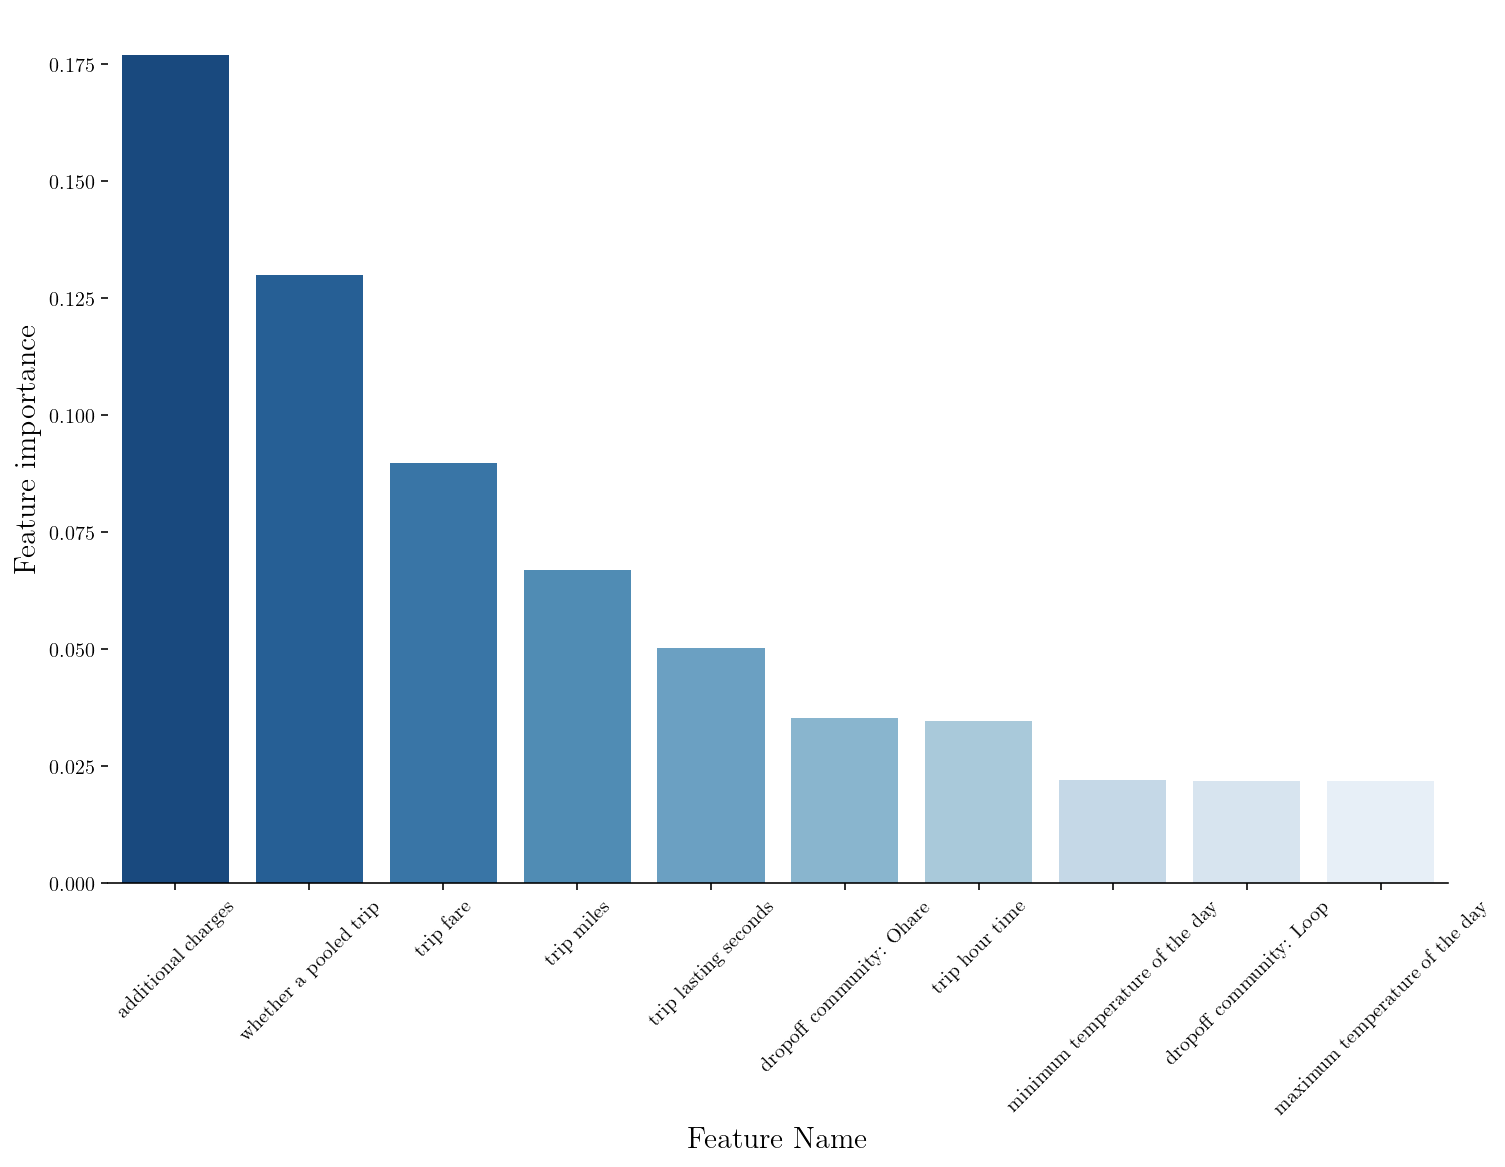

In [209]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x="feature", y="value", data=top10_RF, palette="Blues_r")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
# ax.set_title("Top 10 Features", fontsize=25)
ax.set_ylabel("Feature importance", fontsize=15)
ax.set_xlabel("Feature Name", fontsize=15)
plt.savefig(
    "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/26_images/top10features_RF.png",
    bbox_inches="tight",
    dpi=400
)
plt.show()

### XGBoost

In [67]:
xgbc = xgb.XGBClassifier(use_label_encoder=False, tree_method="hist")
pipe_xgb = Pipeline(steps=[("scaler", StandardScaler()), ("model", xgbc)])
pipe_xgb.fit(X_train, np.ravel(y_train))
pipe_xgb.score(X_val, np.ravel(y_val))

[15:55:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8227816341891779

In [64]:
xgbc = xgb.XGBClassifier(use_label_encoder=False, eta=0.1, gamma=5, max_depth=4, tree_method="hist")
pipe_xgb = Pipeline(steps=[("scaler", MinMaxScaler()), ("model", xgbc)])
pipe_xgb.fit(X_train, np.ravel(y_train))
# pipe_xgb.score(X_val, np.ravel(y_val))
prob_xgb = pipe_xgb.predict_proba(X_val)[:,1]
roc_auc_score(y_val, pipe_xgb.predict_proba(X_val)[:,1])

[15:24:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6521222690076834

Sensitivity vs specificity

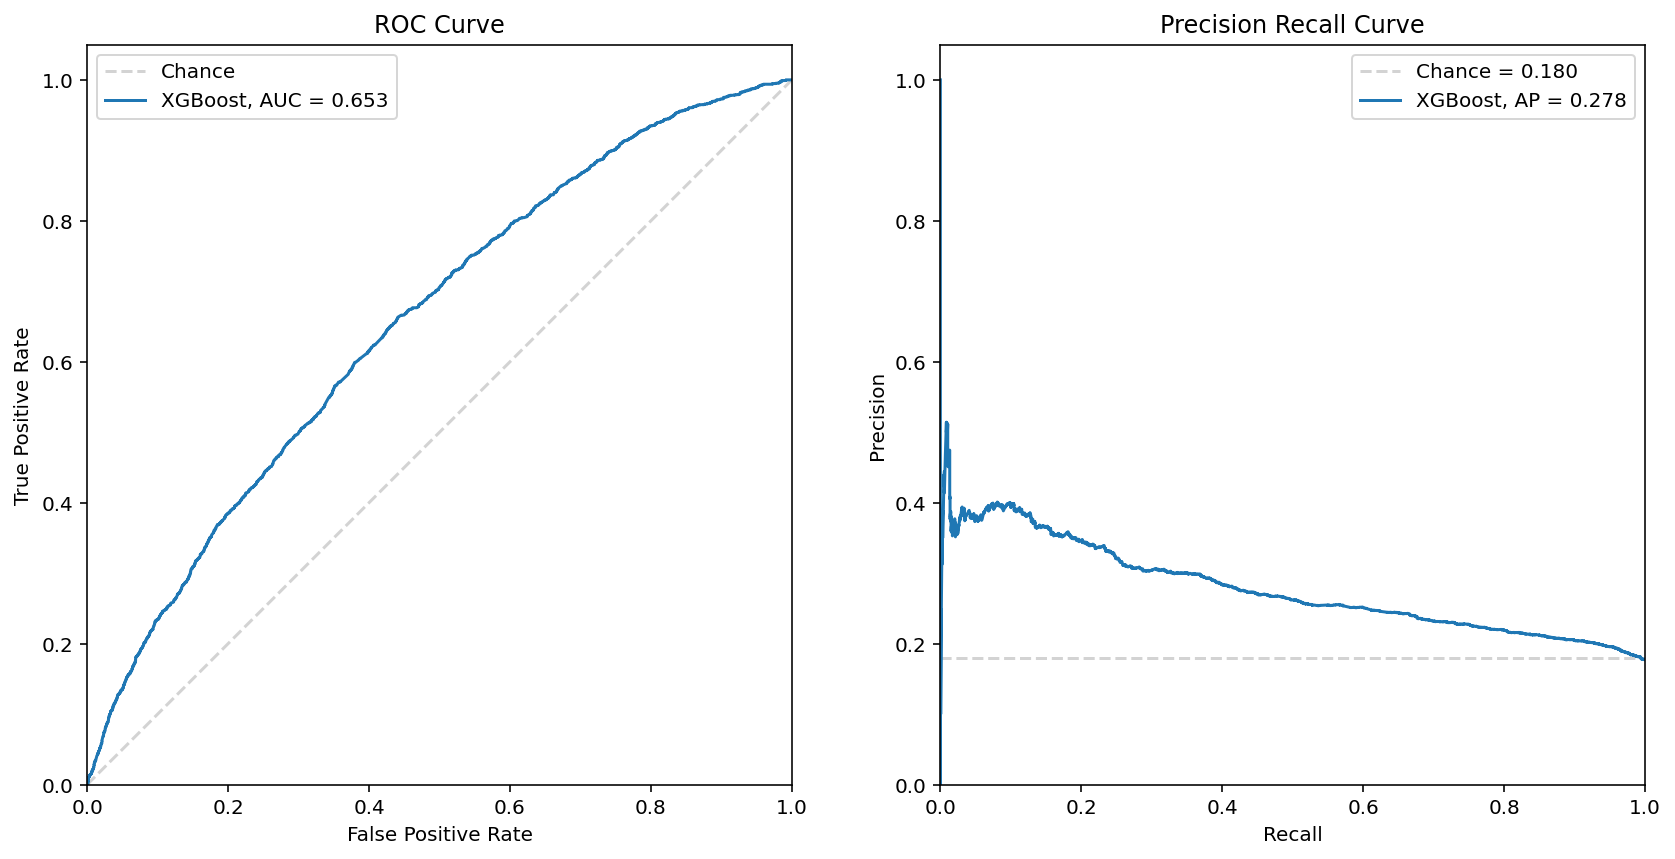

In [83]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Initialize each plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the chance diagonal and PR random chance lines
axs[0].plot((0, 1), (0, 1), color="lightgrey", linestyle="--", label="Chance")
axs[1].plot(
    (0, 1),
    (fraction_positive_examples, fraction_positive_examples),
    color="lightgrey",
    linestyle="--",
    label="Chance = {:.3f}".format(fraction_positive_examples),
)
score = prob_xgb
fpr, tpr, _ = roc_curve(y_val, score)
precision, recall, _ = precision_recall_curve(y_val, score)
roc_auc = auc(fpr, tpr)
ap = average_precision_score(y_val, score)
    
# Plot the ROC curve
axs[0].plot(fpr, tpr, label="XGBoost" + ', AUC = {:.3f}'.format(roc_auc))

# Plot the PR curve
axs[1].plot(recall, precision, label= "XGBoost" + ', AP = {:.3f}'.format(ap))

for ax in axs:
    ax.axis('square')
    ax.set(xlim=(0,1), ylim=(0,1.05))
    ax.legend()
axs[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curve')
axs[1].set(xlabel='Recall', ylabel='Precision', title='Precision Recall Curve')
plt.tight_layout()
plt.show()

Tuning XGBoost  


Parameter:  
- eta (learning rate)
- gamma (minimum loss reduction required to make a split)
- max_depth (typically 3-10)


In [66]:
# set up random search
xgbc = xgb.XGBClassifier(use_label_encoder=False, tree_method="hist")
pipe_xgb = Pipeline(steps=[("scaler", MinMaxScaler()), ("model", xgbc)])

param_xgb = {
    "model__eta": [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    "model__gamma": [1, 2, 3, 4, 5, 6],
    "model__max_depth": [1, 2, 3, 4, 5],
}

search = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=param_xgb,
    n_iter=500,
    cv=10,
    scoring="roc_auc",
    n_jobs=-1,
)
search.fit(X_train, np.ravel(y_train))
prob_xgb = search.predict_proba(X_val)[:, 1]
print(search.best_params_)
print("best score:", search.best_score_)

/Users/yangshining/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 210 is smaller than n_iter=500. Running 210 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[16:00:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:27] WARNING: /Users/runner/miniforge3/cond

In [288]:
# fit the model using optimal parameters
xgb_op = xgb.XGBClassifier(use_label_encoder=False, max_depth=3, model__gamma=1, model__eta=0.3, tree_method="hist")
pipe_xgb_op = Pipeline(steps=[("scaler", MinMaxScaler()), ("model", xgb_op)])
pipe_xgb_op.fit(X_train, y_train)

[12:30:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "model__eta", "model__gamma" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:30:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=nan,
                               model__eta=0.3, model__gamma=1,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='hist', use_label_encoder=False

In [289]:
# retrain the model on train + val
pipe_xgb_op.fit(X_train_val, y_train_val)
score_xgb = pipe_xgb_op.predict_proba(X_test)[:, 1]
create_submission(
    score_xgb,
    "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/30_predict_proba_results/score_xgb.csv",
)

[12:30:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "model__eta", "model__gamma" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:30:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=nan,
                               model__eta=0.3, model__gamma=1,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='hist', use_label_encoder=False

auc per community - XGBoost

In [290]:
# predict ROC AUC for every community area
community = train_original["pickup_community_name"].unique()
auc_comm = []

for com in community:
    temp = test[test[f"pickup_community_name_{com}"] == 1]
    if len(temp["nonzero_tip"].unique()) == 1:
        auc_comm.append(np.nan)
    else:
        temp_x = temp[temp.columns.difference(["nonzero_tip", "tip"])]
        temp_y = temp[["nonzero_tip"]]
        score = pipe_xgb_op.predict_proba(temp_x)[:,1]
        auc_com = roc_auc_score(temp_y, score)
        auc_comm.append(auc_com)

com_auc = {"community": community, "auc": auc_comm}
com_auc_xgb = pd.DataFrame(com_auc)


In [291]:
com_auc_xgb.to_csv("/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/com_auc_xgb.csv")

Extract top 10 important features - XGBoost

In [157]:
## get pipeline feature names
feature_names_xgb = pipe_xgb_op[:-1].get_feature_names_out()

## get feature importance from RF
feature_importance_xgb = pipe_xgb_op.steps[1][1].feature_importances_

In [159]:
# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names_xgb, feature_importance_xgb)
df_xgb = pd.DataFrame(zipped, columns=["feature", "value"])

# Sort the features by the absolute value of their coefficient
# df["abs_value"] = df["value"].apply(lambda x: abs(x))
# df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df_xgb = df_xgb.sort_values("value", ascending=False, ignore_index=True)

In [162]:
top10_xgb = df_xgb.head(10)
top10_xgb

,feature,value
0,trips_pooled,0.076690
1,additional_charges,0.044385
2,dropoff_community_name_LOOP,0.024618
3,dropoff_community_name_NEAR NORTH SIDE,0.024347
4,pickup_community_name_LOOP,0.021314
5,year,0.018664
6,pickup_community_name_AUSTIN,0.017582
7,pickup_community_name_GREATER GRAND CROSSING,0.016360
8,dropoff_community_name_GREATER GRAND CROSSING,0.014983
9,pickup_community_name_SOUTH SHORE,0.014728


In [163]:
# change the name of top 10 features 
top10_xgb.loc[0,"feature"] = "whether a pooled trip"
top10_xgb.loc[1,"feature"] = "additional charges"
top10_xgb.loc[2,"feature"] = "dropoff community: Loop"
top10_xgb.loc[3,"feature"] = "dropoff community: Near North Side"
top10_xgb.loc[4,"feature"] = "pickup community: Loop"
top10_xgb.loc[5,"feature"] = "year"
top10_xgb.loc[6,"feature"] = "dropoff community: Austin"
top10_xgb.loc[7,"feature"] = "pickup community: Greater Grand Crossing"
top10_xgb.loc[8,"feature"] = "dropoff community: Greater Grand Crossing"
top10_xgb.loc[9,"feature"] = "pickup community: South Shore"

/Users/yangshining/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


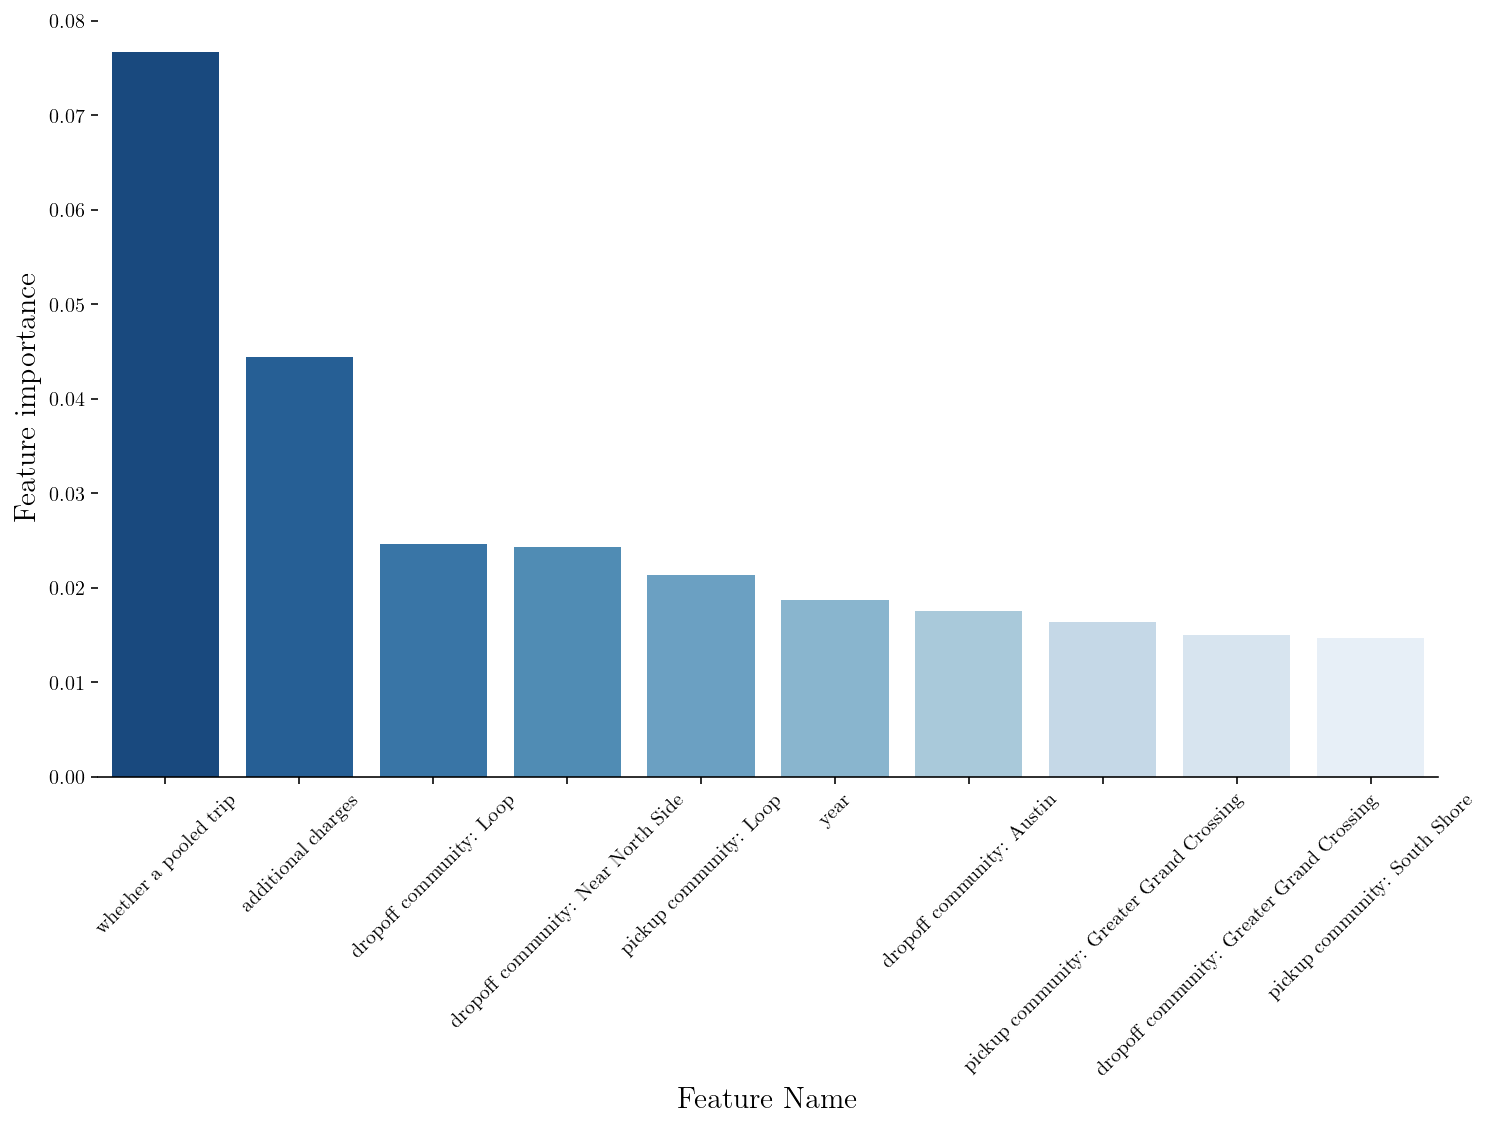

In [210]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=top10_xgb,
            palette="Blues_r")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
#ax.set_title("Top 10 Features", fontsize=25)
ax.set_ylabel("Feature importance", fontsize=15)
ax.set_xlabel("Feature Name", fontsize=15)
plt.savefig(
    "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/26_images/top10features_xgb.png",
    bbox_inches="tight",
    dpi=400
)
plt.show()

### Look at peak & post-covid data

In [215]:
new_train = pd.read_csv(
    "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/15_modified_data/train_post_covid.csv"
)
new_val = pd.read_csv(
    "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/15_modified_data/val_post_covid.csv"
)
new_test = pd.read_csv(
    "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/15_modified_data/test_post_covid.csv"
)

peak_covid_train = new_train[new_train["year"] == 2020]
peak_covid_val = new_val[new_val["year"] == 2020]
peak_covid_test = new_test[new_test["year"] == 2020]


In [200]:
X_train2 = peak_covid_train[peak_covid_train.columns.difference(["nonzero_tip", "tip"])]
y_train2 = peak_covid_train[["nonzero_tip"]]
X_val2 = peak_covid_val[peak_covid_val.columns.difference(["nonzero_tip", "tip"])]
y_val2= peak_covid_val[["nonzero_tip"]]
X_test2 = peak_covid_test[peak_covid_test.columns.difference(["nonzero_tip", "tip"])]
y_test2 = peak_covid_test[["nonzero_tip"]]

In [234]:
data = pd.concat([train_original, peak_covid_train, peak_covid_val, peak_covid_test], keys=[0, 1, 2, 3])
data = data[
    data.columns.difference(["trip_start_timestamp", "trip_end_timestamp", "date", "snow", "snow_depth"])
]
# re-organize the order of the columns
data = data[
    [
        "year",
        "month",
        "day",
        "day_of_week",
        "weekend",
        "hour",
        "fare",
        "tip",
        "nonzero_tip",
        "additional_charges",
        "shared_trip_authorized",
        "trips_pooled",
        "trip_miles",
        "trip_seconds",
        "pickup_community_name",
        "dropoff_community_name",
        "precip",
        "max_temp",
        "min_temp",
        "wind_speed"
    ]
]

# convert shared_trip_authorized to a dummy
data["shared_trip_authorized"] = np.where(
    data["shared_trip_authorized"] == "True", 1, 0
)
data.head(10)


year      month  day day_of_week  weekend  hour  fare  tip  nonzero_tip  \
0 0  2019  September   24     Tuesday        0     6  10.0  3.0            1   
  1  2019       July   30     Tuesday        0    11  35.0  0.0            0   
  2  2018   November   17    Saturday        1     1  10.0  0.0            0   
  3  2019   December    9      Monday        0    12   7.5  1.0            1   
  4  2018   December   17      Monday        0    15   7.5  0.0            0   
  5  2018   December    3      Monday        0     9   5.0  0.0            0   
  6  2019     August   23      Friday        1    14  12.5  0.0            0   
  7  2018   December   15    Saturday        1    17   7.5  0.0            0   
  8  2019       July   19      Friday        1     9  22.5  4.0            1   
  9  2019   February   14    Thursday        0    18   2.5  0.0            0   

     additional_charges  shared_trip_authorized  trips_pooled  trip_miles  \
0 0                2.55                       0             1    6.183132   
  1                8.11                       0             1   18.248731   
  2                2.50                       0             1    5.277118   
  3                2.55                       0             1    3.079843   
  4                2.50                       0             1    2.996371   
  5                0.00                       0             3    1.415615   
  6                2.55                       0             1    5.171532   
  7                2.50                       0             2    7.953680   
  8                7.55                       0             1   15.367562   
  9                2.55                       0             1    0.887416   

     trip_seconds pickup_community_name  dropoff_community_name    precip  \
0 0         802.0          LINCOLN PARK          NEAR WEST SIDE  0.000000   
  1        2349.0                 OHARE         NEAR NORTH SIDE  0.000000   
  2         684.0       NEAR NORTH SIDE            NORTH CENTER  1.181102   
  3         698.0             WEST TOWN          NEAR WEST SIDE  0.196850   
  4         812.0           SOUTH SHORE  GREATER GRAND CROSSING  0.000000   
  5         569.0       NEAR NORTH SIDE                    LOOP  0.000000   
  6        1297.0                UPTOWN         NEAR NORTH SIDE  0.000000   
  7        1541.0                  LOOP           BRIGHTON PARK  0.000000   
  8        1921.0       NEAR NORTH SIDE          GARFIELD RIDGE  0.000000   
  9         172.0                  LOOP         NEAR SOUTH SIDE  0.000000   

     max_temp  min_temp  wind_speed  
0 0     80.06     80.06   210.27236  
  1     78.98     78.98   161.05968  
  2     37.04     37.04   161.05968  
  3     48.92     48.92   279.61750  
  4     60.08     60.08   161.05968  
  5     35.96     35.96   250.53728  
  6     75.02     75.02   199.08766  
  7     48.02     48.02   161.05968  
  8     95.00     95.00   199.08766  
  9     46.04     46.04   239.35258

In [219]:
data.isnull().sum()

year                      0
month                     0
day                       0
day_of_week               0
weekend                   0
hour                      0
fare                      0
tip                       0
nonzero_tip               0
additional_charges        0
shared_trip_authorized    0
trips_pooled              0
trip_miles                0
trip_seconds              0
pickup_community_name     0
dropoff_community_name    0
precip                    0
max_temp                  0
min_temp                  0
wind_speed                0
dtype: int64

### Feature Engineering

In [235]:
month_map = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}
data["month_int"] = data["month"].map(month_map)
day_map = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7,
}
data["day_ofweek_int"] = data["day_of_week"].map(day_map)
# train['day_ofweek_int'].value_counts()
# train.drop(['day_of_week', 'month' ], axis=1, inplace=True)
data.head(10)


year      month  day day_of_week  weekend  hour  fare  tip  nonzero_tip  \
0 0  2019  September   24     Tuesday        0     6  10.0  3.0            1   
  1  2019       July   30     Tuesday        0    11  35.0  0.0            0   
  2  2018   November   17    Saturday        1     1  10.0  0.0            0   
  3  2019   December    9      Monday        0    12   7.5  1.0            1   
  4  2018   December   17      Monday        0    15   7.5  0.0            0   
  5  2018   December    3      Monday        0     9   5.0  0.0            0   
  6  2019     August   23      Friday        1    14  12.5  0.0            0   
  7  2018   December   15    Saturday        1    17   7.5  0.0            0   
  8  2019       July   19      Friday        1     9  22.5  4.0            1   
  9  2019   February   14    Thursday        0    18   2.5  0.0            0   

     additional_charges  shared_trip_authorized  trips_pooled  trip_miles  \
0 0                2.55                       0             1    6.183132   
  1                8.11                       0             1   18.248731   
  2                2.50                       0             1    5.277118   
  3                2.55                       0             1    3.079843   
  4                2.50                       0             1    2.996371   
  5                0.00                       0             3    1.415615   
  6                2.55                       0             1    5.171532   
  7                2.50                       0             2    7.953680   
  8                7.55                       0             1   15.367562   
  9                2.55                       0             1    0.887416   

     trip_seconds pickup_community_name  dropoff_community_name    precip  \
0 0         802.0          LINCOLN PARK          NEAR WEST SIDE  0.000000   
  1        2349.0                 OHARE         NEAR NORTH SIDE  0.000000   
  2         684.0       NEAR NORTH SIDE            NORTH CENTER  1.181102   
  3         698.0             WEST TOWN          NEAR WEST SIDE  0.196850   
  4         812.0           SOUTH SHORE  GREATER GRAND CROSSING  0.000000   
  5         569.0       NEAR NORTH SIDE                    LOOP  0.000000   
  6        1297.0                UPTOWN         NEAR NORTH SIDE  0.000000   
  7        1541.0                  LOOP           BRIGHTON PARK  0.000000   
  8        1921.0       NEAR NORTH SIDE          GARFIELD RIDGE  0.000000   
  9         172.0                  LOOP         NEAR SOUTH SIDE  0.000000   

     max_temp  min_temp  wind_speed  month_int  day_ofweek_int  
0 0     80.06     80.06   210.27236          9               2  
  1     78.98     78.98   161.05968          7               2  
  2     37.04     37.04   161.05968         11               6  
  3     48.92     48.92   279.61750         12               1  
  4     60.08     60.08   161.05968         12               1  
  5     35.96     35.96   250.53728         12               1  
  6     75.02     75.02   199.08766          8               5  
  7     48.02     48.02   161.05968         12               6  
  8     95.00     95.00   199.08766          7               5  
  9     46.04     46.04   239.35258          2               4

day hour

In [236]:
data['time_of_day'] = 's'
data.loc[(data['hour'] >= 4) & (data['hour'] < 7), 'time_of_day'] = 'early morning'
data.loc[(data['hour'] >= 7) & (data['hour'] < 11), 'time_of_day'] = 'morning rush hour'
data.loc[(data['hour'] >= 11) & (data['hour'] < 14), 'time_of_day'] = 'midday'
data.loc[(data['hour'] >= 14) & (data['hour'] < 16), 'time_of_day'] = 'afternoon'
data.loc[(data['hour'] >= 16) & (data['hour'] < 19), 'time_of_day'] = 'aft rush hour'
data.loc[(data['hour'] >= 19) & (data['hour'] < 23), 'time_of_day'] = 'evening'
data.loc[(data['hour'] >= 23) | (data['hour'] < 4), 'time_of_day'] = 'late night'

season

In [237]:
data['season'] = 's'
data.loc[(data['month_int'] >= 3) & (data['month_int'] <= 5), 'season'] = 'spring'
data.loc[(data['month_int'] >= 6) & (data['month_int'] <= 8), 'season'] = 'summer'
data.loc[(data['month_int'] >= 9) & (data['month_int'] <= 11), 'season'] = 'autumn'
data.loc[(data['month_int'] >= 12) | (data['month_int'] <= 2), 'season'] = 'winter'

Public holiday

In [238]:
data['public_hol'] = 0

data.loc[(data['month_int'] == 1) & (data['day'] == 1), 'public_hol'] = 1
data.loc[(data['month_int'] == 6) & (data['day'] == 19), 'public_hol'] = 1
data.loc[(data['month_int'] == 7) & (data['day'] == 4), 'public_hol'] = 1
data.loc[(data['month_int'] == 11) & (data['day'] == 11), 'public_hol'] = 1
data.loc[(data['month_int'] == 12) & (data['day'] == 25), 'public_hol'] = 1

# MLK
data.loc[(data['month_int'] == 1) & (data['day'] == 15) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 1) & (data['day'] == 21) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 1) & (data['day'] == 20) & (data['year'] == 2020), 'public_hol'] = 1

# presidents day
data.loc[(data['month_int'] == 2) & (data['day'] == 19) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 2) & (data['day'] == 18) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 2) & (data['day'] == 17) & (data['year'] == 2020), 'public_hol'] = 1

# memorial
data.loc[(data['month_int'] == 5) & (data['day'] == 28) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 5) & (data['day'] == 27) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 5) & (data['day'] == 25) & (data['year'] == 2020), 'public_hol'] = 1

# labour day
data.loc[(data['month_int'] == 9) & (data['day'] == 3) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 9) & (data['day'] == 2) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 9) & (data['day'] == 7) & (data['year'] == 2020), 'public_hol'] = 1


# columbus day
data.loc[(data['month_int'] == 10) & (data['day'] == 8) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 10) & (data['day'] == 14) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 10) & (data['day'] == 12) & (data['year'] == 2020), 'public_hol'] = 1


# thanksgiving
data.loc[(data['month_int'] == 11) & (data['day'] == 22) & (data['year'] == 2018), 'public_hol'] = 1
data.loc[(data['month_int'] == 11) & (data['day'] == 28) & (data['year'] == 2019), 'public_hol'] = 1
data.loc[(data['month_int'] == 11) & (data['day'] == 26) & (data['year'] == 2020), 'public_hol'] = 1

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1176300 entries, (0, 0) to (2, 263277)
Data columns (total 25 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   year                    1176300 non-null  int64  
 1   month                   1176300 non-null  object 
 2   day                     1176300 non-null  int64  
 3   day_of_week             1176300 non-null  object 
 4   weekend                 1176300 non-null  int64  
 5   hour                    1176300 non-null  int64  
 6   fare                    1176300 non-null  float64
 7   tip                     1176300 non-null  float64
 8   nonzero_tip             1176300 non-null  int64  
 9   additional_charges      1176300 non-null  float64
 10  shared_trip_authorized  1176300 non-null  int64  
 11  trips_pooled            1176300 non-null  int64  
 12  trip_miles              1176300 non-null  float64
 13  trip_seconds            1176300 non-null  int64 

In [239]:
data.drop(["month_int", "day_ofweek_int"], axis=1,inplace=True)

In [240]:
encode = pd.get_dummies(data)
encode

year  day  weekend  hour  fare  tip  nonzero_tip  \
0 0       2019   24        0     6  10.0  3.0            1   
  1       2019   30        0    11  35.0  0.0            0   
  2       2018   17        1     1  10.0  0.0            0   
  3       2019    9        0    12   7.5  1.0            1   
  4       2018   17        0    15   7.5  0.0            0   
...        ...  ...      ...   ...   ...  ...          ...   
3 263273  2020   26        0     7   5.0  0.0            0   
  263274  2020   15        0     9   5.0  1.0            1   
  263275  2020   23        0    20  12.5  0.0            0   
  263276  2020   30        0    10   5.0  0.0            0   
  263277  2020   29        0    17  32.5  0.0            0   

          additional_charges  shared_trip_authorized  trips_pooled  \
0 0                     2.55                       0             1   
  1                     8.11                       0             1   
  2                     2.50                       0             1   
  3                     2.55                       0             1   
  4                     2.50                       0             1   
...                      ...                     ...           ...   
3 263273                4.83                       0             1   
  263274                3.08                       0             1   
  263275                3.08                       0             1   
  263276                4.83                       0             1   
  263277                3.65                       0             1   

          trip_miles  trip_seconds     precip  max_temp  min_temp  wind_speed  \
0 0         6.183132         802.0   0.000000     80.06     80.06   210.27236   
  1        18.248731        2349.0   0.000000     78.98     78.98   161.05968   
  2         5.277118         684.0   1.181102     37.04     37.04   161.05968   
  3         3.079843         698.0   0.196850     48.92     48.92   279.61750   
  4         2.996371         812.0   0.000000     60.08     60.08   161.05968   
...              ...           ...        ...       ...       ...         ...   
3 263273    2.318163         377.0   0.000000     89.06     89.06   210.27236   
  263274    2.153292         557.0   0.000000     73.04     73.04   181.19214   
  263275    5.800000        1409.0   0.000000     80.96     80.96   181.19214   
  263276    0.840000         342.0   0.000000     89.06     89.06   161.05968   
  263277   22.770000        1840.0  19.685039     62.06     62.06   259.48504   

          public_hol  month_April  month_August  month_December  \
0 0                0            0             0               0   
  1                0            0             0               0   
  2                0            0             0               0   
  3                0            0             0               1   
  4                0            0             0               1   
...              ...          ...           ...             ...   
3 263273           0            0             0               0   
  263274           0            0             0               0   
  263275           0            0             0               0   
  263276           0            0             0               0   
  263277           0            1             0               0   

          month_February  month_January  month_July  month_June  month_March  \
0 0                    0              0           0           0            0   
  1                    0              0           1           0            0   
  2                    0              0           0           0            0   
  3                    0              0           0           0            0   
  4                    0              0           0           0            0   
...                  ...            ...         ...         ...          ...   
3 263273               0              0           0           0            0   
  2632

Split training and validation set

In [241]:
train_post, val_post, test_post = encode.xs(1),encode.xs(2), encode.xs(3)

In [242]:
X_train_post = train_post[train_post.columns.difference(["nonzero_tip", "tip"])]
y_train_post = train_post[["nonzero_tip"]]
X_val_post = val_post[val_post.columns.difference(["nonzero_tip", "tip"])]
y_val_post = val_post[["nonzero_tip"]]
X_test_post = test_post[test_post.columns.difference(["nonzero_tip", "tip"])]
y_test_post = test_post[["nonzero_tip"]]

In [251]:
X_val_post

,additional_charges,day,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,dropoff_community_name_ALBANY PARK,dropoff_community_name_ARCHER HEIGHTS,dropoff_community_name_ARMOUR SQUARE,dropoff_community_name_ASHBURN,dropoff_community_name_AUBURN GRESHAM,dropoff_community_name_AUSTIN,dropoff_community_name_AVALON PARK,dropoff_community_name_AVONDALE,dropoff_community_name_BELMONT CRAGIN,dropoff_community_name_BEVERLY,dropoff_community_name_BRIDGEPORT,dropoff_community_name_BRIGHTON PARK,dropoff_community_name_BURNSIDE,dropoff_community_name_CALUMET HEIGHTS,dropoff_community_name_CHATHAM,dropoff_community_name_CHICAGO LAWN,dropoff_community_name_CLEARING,dropoff_community_name_DOUGLAS,dropoff_community_name_DUNNING,dropoff_community_name_EAST GARFIELD PARK,dropoff_community_name_EAST SIDE,dropoff_community_name_EDGEWATER,dropoff_community_name_EDISON PARK,dropoff_community_name_ENGLEWOOD,dropoff_community_name_FOREST GLEN,dropoff_community_name_FULLER PARK,dropoff_community_name_GAGE PARK,dropoff_community_name_GARFIELD RIDGE,dropoff_community_name_GRAND BOULEVARD,dropoff_community_name_GREATER GRAND CROSSING,dropoff_community_name_HEGEWISCH,dropoff_community_name_HERMOSA,dropoff_community_name_HUMBOLDT PARK,dropoff_community_name_HYDE PARK,dropoff_community_name_IRVING PARK,dropoff_community_name_JEFFERSON PARK,dropoff_community_name_KENWOOD,dropoff_community_name_LAKE VIEW,dropoff_community_name_LINCOLN PARK,dropoff_community_name_LINCOLN SQUARE,dropoff_community_name_LOGAN SQUARE,dropoff_community_name_LOOP,dropoff_community_name_LOWER WEST SIDE,dropoff_community_name_MCKINLEY PARK,dropoff_community_name_MONTCLARE,dropoff_community_name_MORGAN PARK,dropoff_community_name_MOUNT GREENWOOD,dropoff_community_name_NEAR NORTH SIDE,dropoff_community_name_NEAR SOUTH SIDE,dropoff_community_name_NEAR WEST SIDE,dropoff_community_name_NEW CITY,dropoff_community_name_NORTH CENTER,dropoff_community_name_NORTH LAWNDALE,dropoff_community_name_NORTH PARK,dropoff_community_name_NORWOOD PARK,dropoff_community_name_OAKLAND,dropoff_community_name_OHARE,dropoff_community_name_PORTAGE PARK,dropoff_community_name_PULLMAN,dropoff_community_name_RIVERDALE,dropoff_community_name_ROGERS PARK,dropoff_community_name_ROSELAND,dropoff_community_name_SOUTH CHICAGO,dropoff_community_name_SOUTH DEERING,dropoff_community_name_SOUTH LAWNDALE,dropoff_community_name_SOUTH SHORE,dropoff_community_name_UPTOWN,dropoff_community_name_WASHINGTON HEIGHTS,dropoff_community_name_WASHINGTON PARK,dropoff_community_name_WEST ELSDON,dropoff_community_name_WEST ENGLEWOOD,dropoff_community_name_WEST GARFIELD PARK,dropoff_community_name_WEST LAWN,dropoff_community_name_WEST PULLMAN,dropoff_community_name_WEST RIDGE,dropoff_community_name_WEST TOWN,dropoff_community_name_WOODLAWN,fare,hour,max_temp,min_temp,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,pickup_community_name_ALBANY PARK,pickup_community_name_ARCHER HEIGHTS,pickup_community_name_ARMOUR SQUARE,pickup_community_name_ASHBURN,pickup_community_name_AUBURN GRESHAM,pickup_community_name_AUSTIN,pickup_community_name_AVALON PARK,pickup_community_name_AVONDALE,pickup_community_name_BELMONT CRAGIN,pickup_community_name_BEVERLY,pickup_community_name_BRIDGEPORT,pickup_community_name_BRIGHTON PARK,pickup_community_name_BURNSIDE,pickup_community_name_CALUMET HEIGHTS,pickup_community_name_CHATHAM,pickup_community_name_CHICAGO LAWN,pickup_community_name_CLEARING,pickup_community_name_DOUGLAS,pickup_community_name_DUNNING,pickup_community_name_EAST GARFIELD PARK,pickup_community_name_EAST SIDE,pickup_community_name_EDGEWATER,pickup_community_name_EDISON PARK,pickup_community_name_ENGLEWOOD,pickup_community_name_FOREST GLEN,pickup_community_name_FULLER PARK,pickup_community_name_GAGE PARK,pickup_community_name_GARFIELD RIDGE,pickup_com

In [252]:
y_val_post

,nonzero_tip
1,0
2,1
4,0
5,1
6,0
...,...
131634,0
131635,0
131636,0
131637,1


Predict using XGBoost

In [255]:
# # fit the model using optimal parameters
xgb_op = xgb.XGBClassifier(use_label_encoder=False, max_depth=3, model__gamma=1, model__eta=0.3, tree_method="hist")
X_train_std = MinMaxScaler().fit_transform(X_train)
xgb_op.fit(X_train_std, y_train)

[16:01:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "model__eta", "model__gamma" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              model__eta=0.3, model__gamma=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='hist', use_label_encoder=False,
              validate_parameters=1, ...)

In [267]:
X_val_post_std = MinMaxScaler().fit_transform(X_val_post)
roc_auc_score(y_val_post, xgb_op.predict_proba(X_val_post_std)[:,1])

0.650675281726161

In [261]:
X_test_post

,additional_charges,day,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,dropoff_community_name_ALBANY PARK,dropoff_community_name_ARCHER HEIGHTS,dropoff_community_name_ARMOUR SQUARE,dropoff_community_name_ASHBURN,dropoff_community_name_AUBURN GRESHAM,dropoff_community_name_AUSTIN,dropoff_community_name_AVALON PARK,dropoff_community_name_AVONDALE,dropoff_community_name_BELMONT CRAGIN,dropoff_community_name_BEVERLY,dropoff_community_name_BRIDGEPORT,dropoff_community_name_BRIGHTON PARK,dropoff_community_name_BURNSIDE,dropoff_community_name_CALUMET HEIGHTS,dropoff_community_name_CHATHAM,dropoff_community_name_CHICAGO LAWN,dropoff_community_name_CLEARING,dropoff_community_name_DOUGLAS,dropoff_community_name_DUNNING,dropoff_community_name_EAST GARFIELD PARK,dropoff_community_name_EAST SIDE,dropoff_community_name_EDGEWATER,dropoff_community_name_EDISON PARK,dropoff_community_name_ENGLEWOOD,dropoff_community_name_FOREST GLEN,dropoff_community_name_FULLER PARK,dropoff_community_name_GAGE PARK,dropoff_community_name_GARFIELD RIDGE,dropoff_community_name_GRAND BOULEVARD,dropoff_community_name_GREATER GRAND CROSSING,dropoff_community_name_HEGEWISCH,dropoff_community_name_HERMOSA,dropoff_community_name_HUMBOLDT PARK,dropoff_community_name_HYDE PARK,dropoff_community_name_IRVING PARK,dropoff_community_name_JEFFERSON PARK,dropoff_community_name_KENWOOD,dropoff_community_name_LAKE VIEW,dropoff_community_name_LINCOLN PARK,dropoff_community_name_LINCOLN SQUARE,dropoff_community_name_LOGAN SQUARE,dropoff_community_name_LOOP,dropoff_community_name_LOWER WEST SIDE,dropoff_community_name_MCKINLEY PARK,dropoff_community_name_MONTCLARE,dropoff_community_name_MORGAN PARK,dropoff_community_name_MOUNT GREENWOOD,dropoff_community_name_NEAR NORTH SIDE,dropoff_community_name_NEAR SOUTH SIDE,dropoff_community_name_NEAR WEST SIDE,dropoff_community_name_NEW CITY,dropoff_community_name_NORTH CENTER,dropoff_community_name_NORTH LAWNDALE,dropoff_community_name_NORTH PARK,dropoff_community_name_NORWOOD PARK,dropoff_community_name_OAKLAND,dropoff_community_name_OHARE,dropoff_community_name_PORTAGE PARK,dropoff_community_name_PULLMAN,dropoff_community_name_RIVERDALE,dropoff_community_name_ROGERS PARK,dropoff_community_name_ROSELAND,dropoff_community_name_SOUTH CHICAGO,dropoff_community_name_SOUTH DEERING,dropoff_community_name_SOUTH LAWNDALE,dropoff_community_name_SOUTH SHORE,dropoff_community_name_UPTOWN,dropoff_community_name_WASHINGTON HEIGHTS,dropoff_community_name_WASHINGTON PARK,dropoff_community_name_WEST ELSDON,dropoff_community_name_WEST ENGLEWOOD,dropoff_community_name_WEST GARFIELD PARK,dropoff_community_name_WEST LAWN,dropoff_community_name_WEST PULLMAN,dropoff_community_name_WEST RIDGE,dropoff_community_name_WEST TOWN,dropoff_community_name_WOODLAWN,fare,hour,max_temp,min_temp,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,pickup_community_name_ALBANY PARK,pickup_community_name_ARCHER HEIGHTS,pickup_community_name_ARMOUR SQUARE,pickup_community_name_ASHBURN,pickup_community_name_AUBURN GRESHAM,pickup_community_name_AUSTIN,pickup_community_name_AVALON PARK,pickup_community_name_AVONDALE,pickup_community_name_BELMONT CRAGIN,pickup_community_name_BEVERLY,pickup_community_name_BRIDGEPORT,pickup_community_name_BRIGHTON PARK,pickup_community_name_BURNSIDE,pickup_community_name_CALUMET HEIGHTS,pickup_community_name_CHATHAM,pickup_community_name_CHICAGO LAWN,pickup_community_name_CLEARING,pickup_community_name_DOUGLAS,pickup_community_name_DUNNING,pickup_community_name_EAST GARFIELD PARK,pickup_community_name_EAST SIDE,pickup_community_name_EDGEWATER,pickup_community_name_EDISON PARK,pickup_community_name_ENGLEWOOD,pickup_community_name_FOREST GLEN,pickup_community_name_FULLER PARK,pickup_community_name_GAGE PARK,pickup_community_name_GARFIELD RIDGE,pickup_com

In [270]:
# get prediction on validation data

X_val_post_std = MinMaxScaler().fit_transform(X_val_post)
score_xgb_post = xgb_op.predict_proba(X_val_post_std)[:, 1]
create_submission(
    score_xgb_post,
    "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/30_predict_proba_results/score_xgb_post.csv",
)

RF


In [263]:
rf_op = RandomForestClassifier(
    n_estimators=2000,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features="sqrt",
    max_depth=10,
    n_jobs=-1
)

X_train_std = MinMaxScaler().fit_transform(X_train)
rf_op.fit(X_train_std, y_train)

X_val_post_std = MinMaxScaler().fit_transform(X_val_post)
X_test_post_std = MinMaxScaler().fit_transform(X_test_post)

roc_auc_score(y_val_post, rf_op.predict_proba(X_val_post_std)[:,1])

/var/folders/g3/gw7r7tvj63j5wjhsmmnq03qr0000gn/T/ipykernel_50812/2369029056.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_op.fit(X_train_std, y_train)


0.6099819644095121

In [264]:
X_val_std = MinMaxScaler().fit_transform(X_val)
roc_auc_score(y_val, rf_op.predict_proba(X_val_std)[:,1])

0.628520237599239

In [271]:
# create scores on validation data post covid

score_rf_post = rf_op.predict_proba(X_val_post_std)[:, 1]
create_submission(
    score_rf_post,
    "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/30_predict_proba_results/score_rf_post.csv",
)

### LightGBM

In [63]:
lightgbm = lgb.LGBMClassifier(n_estimators=500, n_jobs=-1)
pipe_lgb = Pipeline(steps=[("scaler", MinMaxScaler()), ("model", lightgbm)])
pipe_lgb.fit(X_train, y_train.ravel())
pipe_lgb.score(X_val, y_val.ravel())
roc_auc_score(y_val, pipe_lgb.predict_proba(X_val)[:,1])

0.6416786364806343

In [79]:
lightgbm = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4, num_leaves=16, n_jobs=-1)
pipe_lgb = Pipeline(steps=[("scaler", StandardScaler()), ("model", lightgbm)])
pipe_lgb.fit(X_train, y_train.ravel())
pipe_lgb.score(X_val, y_val.ravel())

0.8220289370243372

tuning hyperparameter

In [47]:
lightgbm = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4, num_leaves=16, n_jobs=-1)
pipe_lgb = Pipeline(steps=[("scaler", StandardScaler()), ("model", lightgbm)])

param = {#'bootstrap': [True, False],
 'model__max_depth': [10, 20, 50, 75, 80, None],
 'model__max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'model__n_estimators': [500, 800, 1000, 1500, 2000, 2500, 3000]}


search = RandomizedSearchCV(pipe_rf, param_distributions=param, verbose=2, n_iter=100, n_jobs=-1)
search.fit(X_train, np.ravel(y_train))
prob_rf1 = search.predict_proba(X_val)[:,1]
print(search.best_params_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


/Users/yangshining/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 84 is smaller than n_iter=100. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.2min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.2min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.2min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.3min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.3min


KeyboardInterrupt: 

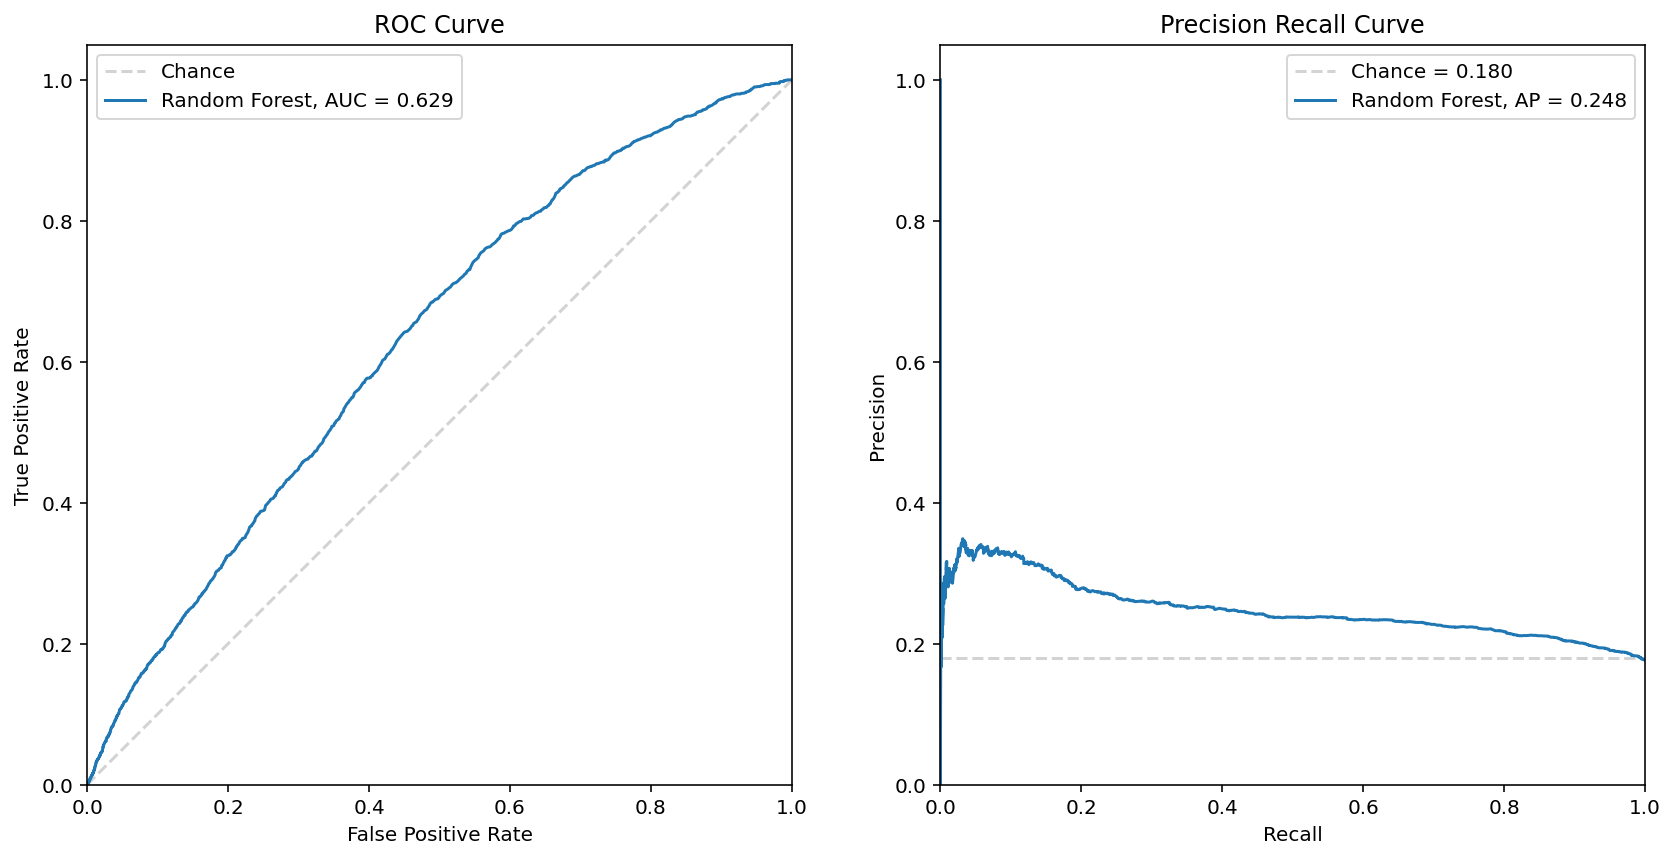

In [53]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Initialize each plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the chance diagonal and PR random chance lines
axs[0].plot((0, 1), (0, 1), color="lightgrey", linestyle="--", label="Chance")
axs[1].plot(
    (0, 1),
    (fraction_positive_examples, fraction_positive_examples),
    color="lightgrey",
    linestyle="--",
    label="Chance = {:.3f}".format(fraction_positive_examples),
)
score = prob_rf
fpr, tpr, _ = roc_curve(y_val, score)
precision, recall, _ = precision_recall_curve(y_val, score)
roc_auc = auc(fpr, tpr)
ap = average_precision_score(y_val, score)
    
# Plot the ROC curve
axs[0].plot(fpr, tpr, label="Random Forest" + ', AUC = {:.3f}'.format(roc_auc))

# Plot the PR curve
axs[1].plot(recall, precision, label= "Random Forest" + ', AP = {:.3f}'.format(ap))

for ax in axs:
    ax.axis('square')
    ax.set(xlim=(0,1), ylim=(0,1.05))
    ax.legend()
axs[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curve')
axs[1].set(xlabel='Recall', ylabel='Precision', title='Precision Recall Curve')
plt.tight_layout()
plt.show()